## How a Decision Tree Learns to Split Data — A Step-by-Step Exploration

Before we jump into formulas, let’s build a full picture of what is happening inside a Decision Tree.

---

### 0. The Big Idea

A **Decision Tree** is like a flowchart of “if–then” questions.  
Its goal is to ask questions that best **separate** the data into **pure groups** — groups that mostly contain a single class.

In our example, we want to predict whether a student **passes (1)** or **fails (0)** based on how many hours they study.

| Student | Hours Studied | Passed |
|----------|---------------|--------|
| A | 2 | 0 |
| B | 3 | 0 |
| C | 6 | 1 |
| D | 7 | 1 |
| E | 8 | 1 |
| F | 9 | 1 |

At the beginning, the tree knows nothing — it sees a **mixed node** with both passes and fails.  
To decide the *first question* (split), it needs a **measure of impurity** — how mixed the classes are.

That’s where **Entropy** and **Gini Impurity** come in.

---

### 1. The Learning Flow

Here’s the reasoning process:

1. **Start** with all the data in one node (the “parent”).  
2. **Measure impurity** of that node using Entropy or Gini.  
3. **Try a possible split** (for example, “Hours Studied < 5”).  
4. For each resulting child node:
   - Compute its own impurity.  
   - Weight those impurities by how many samples each child has.
5. **Compare** impurity *before* and *after* the split.  
   - If impurity decreases a lot, the split is good.  
6. **Choose** the split that gives the **highest Information Gain** (the biggest reduction in impurity).  
7. **Repeat** the process for each branch until the nodes become pure or meet a stopping rule.

This is the core logic of a Decision Tree.

---

### 2. Step 1 — Entropy: Measuring Uncertainty

Entropy quantifies how *mixed* a node is.  
If all records belong to one class → Entropy = 0 (pure).  
If classes are evenly mixed → Entropy = 1 (completely uncertain).

The formula is:

$$
H(t) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

where:
- $C$ = number of classes (here 2: Pass, Fail),
- $p_i$ = probability (or proportion) of class $i$ in that node.

---

#### Why compute class probabilities?

We calculate $p_i$ because a tree needs to *understand how dominant each class is in a node*.  
A node with $p_\text{pass}=0.9$ and $p_\text{fail}=0.1$ is almost pure — there’s little uncertainty.  
But if both are around 0.5, the model is “confused” — it needs a split.

So, probabilities tell us *how mixed* the node is.

---

### 3. Step 1.1 — Calculating Entropy for the Parent Node

In our dataset (6 students):

- Pass = 4 students → $p_\text{pass} = 4/6 = 0.667$  
- Fail = 2 students → $p_\text{fail} = 2/6 = 0.333$

Plug into the formula:

$$
H_\text{parent} = -(0.667)\log_2(0.667) - (0.333)\log_2(0.333)
$$

Compute step by step:

- $\log_2(0.667) = -0.585$  
- $\log_2(0.333) = -1.585$

So:

$$
H_\text{parent} = -[(0.667 \times -0.585) + (0.333 \times -1.585)] = 0.918
$$

---

#### What does “0.918 bits” mean?

Entropy is measured in **bits** when using base-2 logarithms.  
It represents the **average amount of information** needed to determine the class of a randomly chosen sample.

- 0 bits → no uncertainty (pure).  
- 1 bit → maximum uncertainty (two classes equally mixed).  

So our node’s uncertainty (0.918 bits) means “almost random but slightly predictable.”

---

### 4. Step 2 — Trying a Split (Hours Studied < 5)

Now we test a rule:  
**If Hours Studied < 5 → Left child**, else → Right child.

This split is chosen because 5 hours looks like a natural boundary between low and high study effort.

After the split:
- Left child: Students A, B (both Fail)  
- Right child: Students C, D, E, F (all Pass)

We’ll now measure how pure each child is.

---

### 5. Step 3 — Entropy of the Child Nodes

**Left child (2 samples):**

- Pass = 0, Fail = 2  
- $p_\text{fail}=1.0$, $p_\text{pass}=0.0$

$$
H_\text{left} = -(1.0)\log_2(1.0) - (0.0)\log_2(0.0) = 0
$$
(The node is perfectly pure — we already know all are fails.)

**Right child (4 samples):**

- Pass = 4, Fail = 0  
- $p_\text{pass}=1.0$, $p_\text{fail}=0.0$

$$
H_\text{right} = 0
$$

---

### 6. Step 4 — Information Gain (How Much Uncertainty Was Removed)

Information Gain measures the **reduction in entropy** after a split.

$$
IG = H_\text{parent} - \left( \frac{N_L}{N}H_\text{left} + \frac{N_R}{N}H_\text{right} \right)
$$

Substitute our numbers:

- $H_\text{parent}=0.918$, $H_\text{left}=0$, $H_\text{right}=0$  
- $N_L=2$, $N_R=4$, $N=6$

$$
IG = 0.918 - \left( \frac{2}{6}\times0 + \frac{4}{6}\times0 \right) = 0.918 
$$

This split **completely removes uncertainty** — the children are pure.  
Therefore, the Information Gain is maximal.

---

### 7. Step 5 — Gini Impurity: Another Way to Measure Purity

While Entropy uses logarithms, the **Gini index** is a simpler formula that measures how often a randomly chosen sample would be misclassified if it were labeled according to the class distribution.

$$
G(t) = 1 - \sum_{i=1}^{C} p_i^2
$$

For the parent node:

$$
G_\text{parent} = 1 - (0.667^2 + 0.333^2) = 1 - (0.445 + 0.111) = 0.444
$$

For both child nodes:
$$
G_\text{left} = G_\text{right} = 0
$$

Weighted Gini after split:
$$
(2/6)\times0 + (4/6)\times0 = 0
$$

Gini reduction (gain):
$$
0.444 - 0 = 0.444
$$

---

### 8. Step 6 — Interpreting the Whole Process

- The tree first **measures impurity** (Entropy or Gini).  
- Then it **tests possible splits** (like “Hours < 5”, “Hours < 6”, etc.).  
- For each split, it computes **Information Gain** — how much uncertainty it removes.  
- Finally, it **chooses the split with the highest gain**.

In our case, “Hours Studied < 5” makes the child nodes perfectly pure → best possible split.

---

### 9. Key Takeaways

1. **Class probabilities** tell us how mixed a node is.  
2. **Entropy** quantifies the uncertainty; **Gini** is a simpler alternative.  
3. **Information Gain** is how much uncertainty we remove by splitting.  
4. The tree **keeps splitting** until either:
   - All nodes are pure, or
   - It reaches a maximum depth / minimum samples limit.
5. “Bits” simply measure *information* in base-2 — not a unit to worry about in practice.

So, entropy and information gain are just the *mathematical way* of saying:
> “Let’s find the question that makes our data as clear and predictable as possible.”


Thresholds at each node: [ 4.5 -2.  -2. ]
Learned rule ≈ hours_studied <= 4.5  (equivalent to 'Hours < 5' for integer hours)


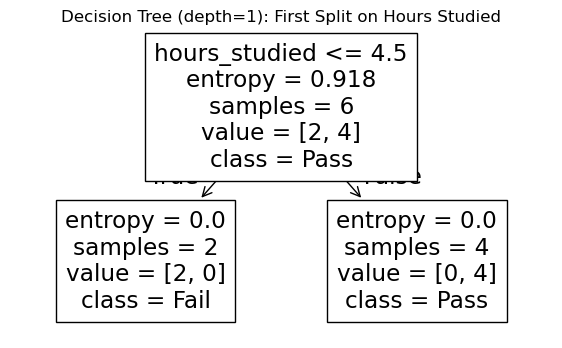

In [1]:
# Visual tree for the very first split (depth=1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Tiny dataset from the walkthrough
df = pd.DataFrame({
    "hours_studied": [2, 3, 6, 7, 8, 9],
    "passed":        [0, 0, 1, 1, 1, 1]
})

X = df[["hours_studied"]].values
y = df["passed"].values

# Single-split stump to visualize the first question only
clf = DecisionTreeClassifier(max_depth=1, criterion="entropy", random_state=0)
clf.fit(X, y)

# Inspect the learned threshold (should be 4.5, the midpoint between 3 and 6)
node_thresholds = clf.tree_.threshold
print("Thresholds at each node:", node_thresholds)
print("Learned rule ≈ hours_studied <= 4.5  (equivalent to 'Hours < 5' for integer hours)")

# Plot
plt.figure(figsize=(7,4))
plot_tree(
    clf,
    feature_names=["hours_studied"],
    class_names=["Fail","Pass"],
    filled=False,          # keep it simple (no colors)
    impurity=True,         # show entropy at nodes
    rounded=False
)
plt.title("Decision Tree (depth=1): First Split on Hours Studied")
plt.show()
